In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.enable_eager_execution()

/home/act65/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
n = 100
x = y = tf.linspace(-1.0, 1.0, n)
X, Y = tf.meshgrid(x, y)
x = tf.reshape(X, [-1])
y = tf.reshape(Y, [-1])
z = tf.stack([x, y],axis=1)

In [3]:
def abs_val(x):
    return tf.square(x)**0.5

def l_p(x, p):
    return tf.reduce_sum(abs_val(x)**float(p), axis=1)**(1.0/float(p))

In [4]:
def calc(z, loss):
    with tf.GradientTape() as tape:
        tape.watch(z)
        l = loss(z)
    dldz = -tape.gradient(l, z)
    return l, dldz

In [5]:
def plotter(X, Y, l, dldz):
    plt.figure(figsize=(8,8))
    plt.contour(X.numpy(), Y.numpy(), np.reshape(l.numpy(), [n, n]), cmap=plt.cm.winter)
    plt.streamplot(X.numpy(), Y.numpy(), np.reshape(dldz.numpy()[:, 0], [n, n]), 
                   np.reshape(dldz.numpy()[:, 1], [n, n]), 
                   density=0.5, cmap=plt.cm.autumn,
                   color=np.reshape(l.numpy(), [n, n]))

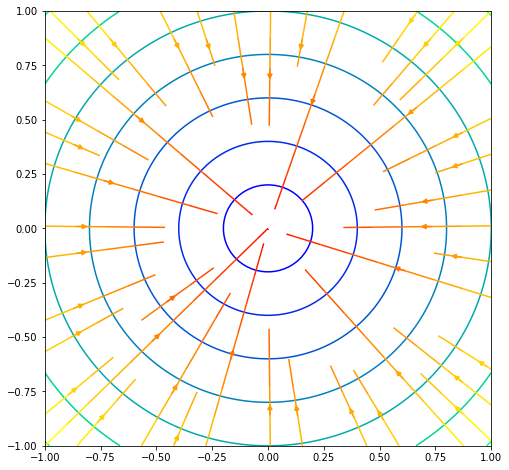

In [6]:
l, dldz = calc(z, lambda x: l_p(x, 2))
plotter(X, Y, l, dldz)

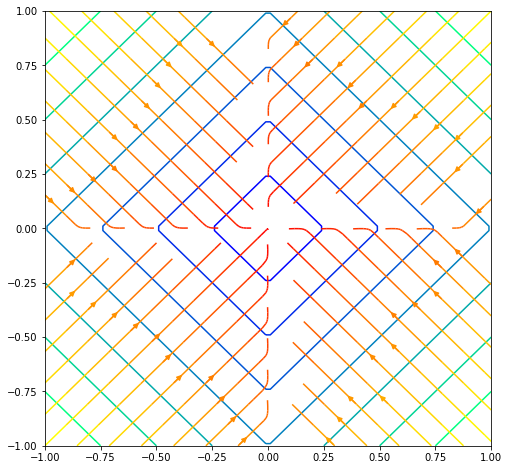

In [8]:
l, dldz = calc(z, lambda x: l_p(x, 1))
plotter(X, Y, l, dldz)

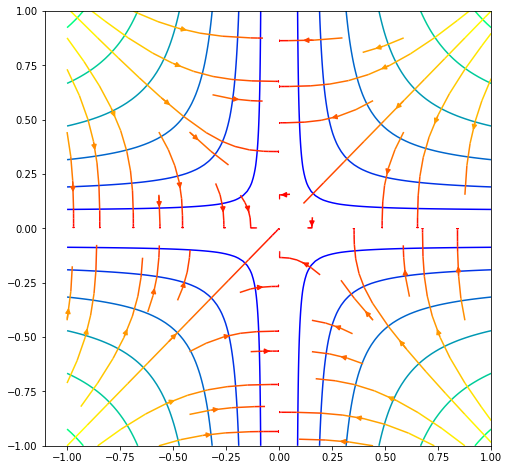

In [7]:
l, dldz = calc(z, lambda x: l_p(x, -1))
plotter(X, Y, l, dldz)

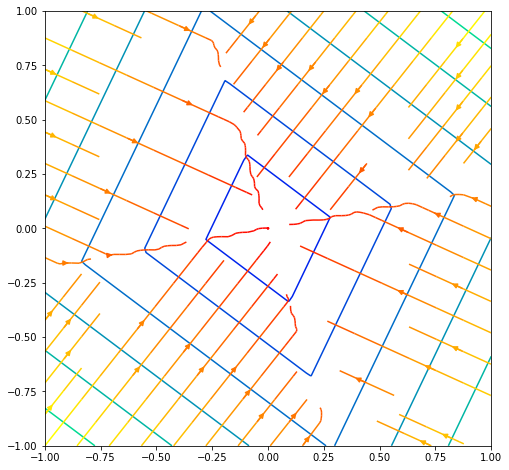

In [173]:
def ortho(x):
    # should be orthogonal to some vectors...
    d = tf.matmul(x, tf.random_normal([2, 2]), transpose_b=True)
    return tf.reduce_sum(tf.abs(d), axis=1)

l, dldz = calc(z, ortho)
plotter(X, Y, l, dldz)

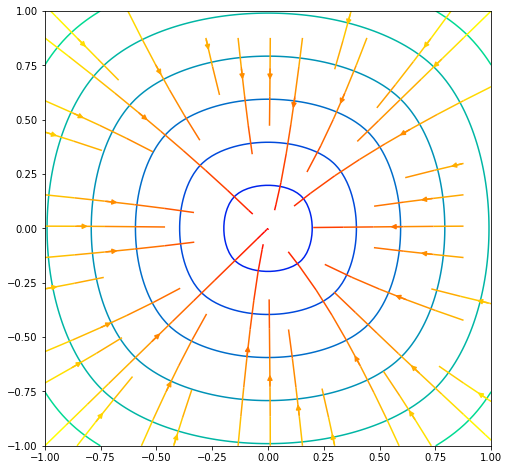

In [177]:
def cov(x):
    # should be orthogonal to some vectors...
    d = tf.matmul(x, x, transpose_b=True)
    return tf.reduce_sum(tf.abs(d), axis=1)

l, dldz = calc(z, cov)
plotter(X, Y, l, dldz)

In [ ]:
def gaussian(x):
    pass

In [221]:
def entropy(p):
    return -p*np.log(p)

def TC(x):
    s =np.sum([entropy(norm.pdf(x_i)) for x_i in tf.unstack(x, axis=1)])
    return s - entropy(multivariate_normal.pdf(x, mean=mean, cov=cov))

In [222]:
TC(tf.random_normal([2, 10]))

array([6.80208101, 6.8020439 ])

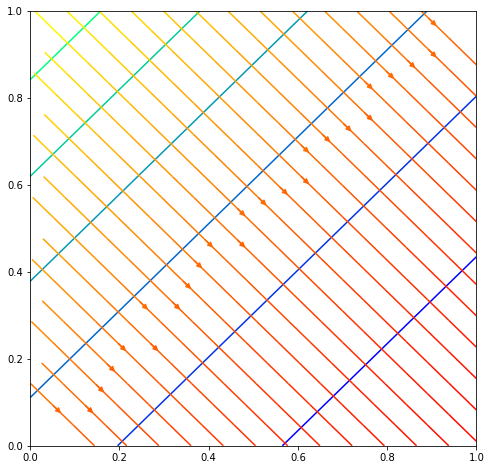

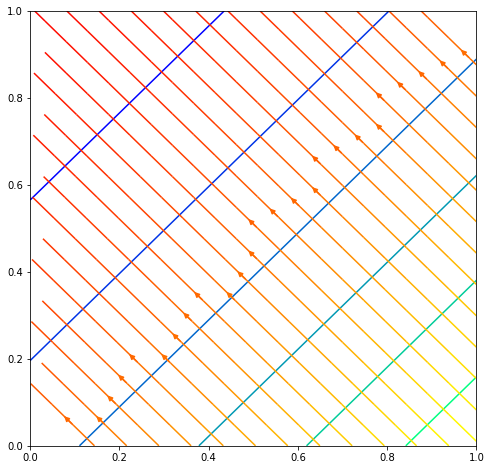

In [22]:
def softmax(x):
    return tf.exp(x)/tf.reduce_sum(tf.exp(x), axis=1, keep_dims=True)

def CE(p, t):
    return -t*tf.log(p[:, 0]) - (1-t)*tf.log(p[:, 1])

n = 100
x = y = tf.linspace(0.0, 1.0, n)
X, Y = tf.meshgrid(x, y)
x = tf.reshape(X, [-1])
y = tf.reshape(Y, [-1])
z = tf.stack([x, y],axis=1)

l, dldz = calc(z, lambda x: CE(softmax(x), t=1.0))
plotter(X, Y, l, dldz)

l, dldz = calc(z, lambda x: CE(softmax(x), t=0.0))
plotter(X, Y, l, dldz)